<a href="https://colab.research.google.com/github/ktrillos2/Parcial-Tkinter/blob/main/notebooks/colab-github-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!mkdir Rosas
!mkdir Dientes
!mkdir Tulipanes
!mkdir Margaritas
!mkdir Girasoles


mkdir: cannot create directory ‘Dientes’: File exists
mkdir: cannot create directory ‘Tulipanes’: File exists
mkdir: cannot create directory ‘Margaritas’: File exists
mkdir: cannot create directory ‘Girasoles’: File exists


In [79]:
%cd /content/Dientes/
!unzip "/content/Dientes/Dientes de Leon.zip" -d "/content/Dientes/"
%cd ..

%cd /content/Girasoles/
!unrar x "/content/Girasoles/Girasoles.rar" "/content/Girasoles/"
%cd ..

%cd /content/Margaritas/
!unrar x "/content/Margaritas/Margaritas.rar" "/content/Margaritas/"
%cd ..


%cd /content/Tulipanes/
!unrar x "/content/Tulipanes/tulip.rar" "/content/Tulipanes/"
%cd ..


/content/Dientes
Archive:  /content/Dientes/Dientes de Leon.zip
replace /content/Dientes/dandelion/10043234166_e6dd915111_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: /content
/content/Girasoles

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Girasoles/Girasoles.rar


Would you like to replace the existing file /content/Girasoles/Girasoles/1008566138_6927679c8a.jpg
143247 bytes, modified on 2021-07-16 21:01
with a new one
143247 bytes, modified on 2021-07-16 21:01

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted
/content
/content/Margaritas

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Margaritas/Margaritas.rar


Would you like to replace the existing file /content/Margaritas/Margaritas/100080576_f52e8ee070_n.jpg
 26797 bytes, modified on 2021-07-16 21:01
with a new one
 26797 bytes, modified on 2021-07-16 21:01

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

P

In [80]:
%cd /content/Rosas/
!unzip "/content/Rosas/ROSAS.zip" -d "/content/ROSAS/"
%cd ..


/content/Rosas
unzip:  cannot find or open /content/Rosas/ROSAS.zip, /content/Rosas/ROSAS.zip.zip or /content/Rosas/ROSAS.zip.ZIP.
/content


In [81]:
!ls /content/Dientes/dandelion | wc -l
!ls /content/Girasoles/Girasoles | wc -l
!ls /content/Margaritas/Margaritas | wc -l
!ls /content/ROSAS/ROSAS | wc -l
!ls /content/Tulipanes/tulip | wc -l


1021
706
728
440
840


In [82]:
!mkdir dataset
!mkdir dataset/Rosas
!mkdir dataset/Dientes
!mkdir dataset/Tulipanes
!mkdir dataset/Margaritas
!mkdir dataset/Girasoles


mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/Rosas’: File exists
mkdir: cannot create directory ‘dataset/Dientes’: File exists
mkdir: cannot create directory ‘dataset/Tulipanes’: File exists
mkdir: cannot create directory ‘dataset/Margaritas’: File exists
mkdir: cannot create directory ‘dataset/Girasoles’: File exists


In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [84]:
import shutil

carpeta_fuente= '/content/Dientes/dandelion'
carpetadestino= '/content/dataset/Dientes'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
  if i <440:
    shutil.copy(carpeta_fuente+'/'+nombreimg, carpetadestino + '/' + nombreimg)

In [85]:
import shutil

carpeta_fuente= '/content/Girasoles/Girasoles'
carpetadestino= '/content/dataset/Girasoles'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
  if i <440:
    shutil.copy(carpeta_fuente+'/'+nombreimg, carpetadestino + '/' + nombreimg)

In [86]:
import shutil

carpeta_fuente= '/content/Margaritas/Margaritas'
carpetadestino= '/content/dataset/Margaritas'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
  if i <440:
    shutil.copy(carpeta_fuente+'/'+nombreimg, carpetadestino + '/' + nombreimg)

In [87]:
import shutil

carpeta_fuente= '/content/ROSAS/ROSAS'
carpetadestino= '/content/dataset/Rosas'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
  if i <440:
    shutil.copy(carpeta_fuente+'/'+nombreimg, carpetadestino + '/' + nombreimg)


In [88]:
import shutil

carpeta_fuente= '/content/Tulipanes/tulip'
carpetadestino= '/content/dataset/Tulipanes'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
  if i <440:
    shutil.copy(carpeta_fuente+'/'+nombreimg, carpetadestino + '/' + nombreimg)

Found 1755 images belonging to 5 classes.
Found 438 images belonging to 5 classes.


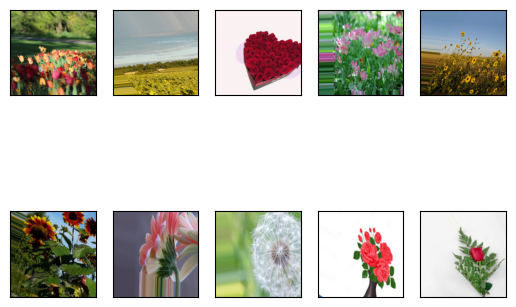

In [15]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [24]:
import tensorflow as tf

from tensorflow import keras

import tensorflow_hub as hub
from tensorflow.keras import layers


In [39]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Cargar MobileNetV2 preentrenado
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Congelar capas base
base_model.trainable = False

# Construir modelo
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(data_gen_entrenamiento.num_classes, activation='softmax')(x)

modelo = models.Model(inputs, outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
modelo.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [41]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [42]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4622 - loss: 1.3849

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4651 - loss: 1.3781 - val_accuracy: 0.7991 - val_loss: 0.6179
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.7961 - loss: 0.5762 - val_accuracy: 0.8288 - val_loss: 0.4774
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8573 - loss: 0.4132 - val_accuracy: 0.8516 - val_loss: 0.4407
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8748 - loss: 0.3545 - val_accuracy: 0.8607 - val_loss: 0.4133
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.8792 - loss: 0.3429 - val_accuracy: 0.8470 - val_loss: 0.4303
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8759 - loss: 0.3468 - val_accuracy: 0.8881 - val_loss: 0.3748
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.8933 - loss: 0.3085 - val_accuracy: 0.8721 - val_loss: 0.3724
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8921 - loss: 0.2937 - val_accuracy: 0.8767 - val_loss: 0.

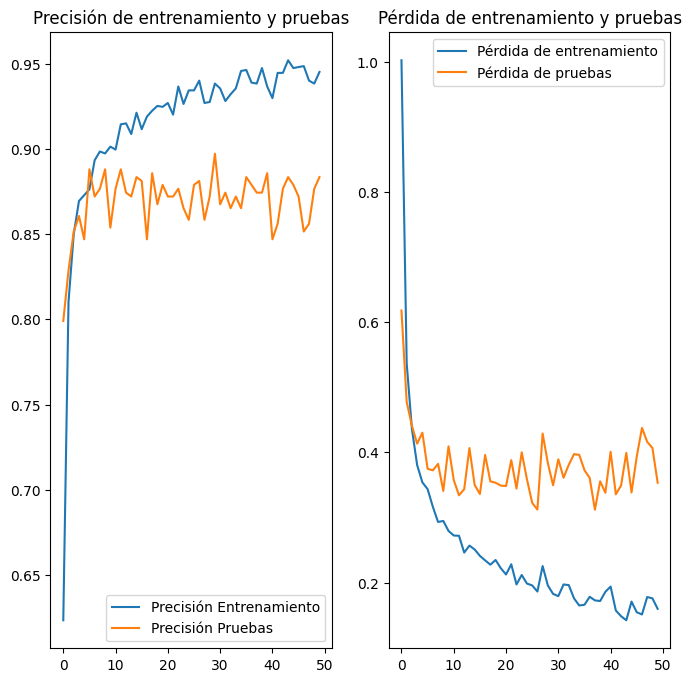

In [43]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [44]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [55]:
#0 = Dientes, 1 = Girasoles, 2 = Margarita, 3= Rosas, 4= Tulipan
url = 'https://live.staticflickr.com/7285/26988956950_2afe7c4203_b.jpg'
prediccion = categorizar (url)
if prediccion == 0:
  print('Dientes')
elif prediccion == 1:
  print('Girasoles')
elif prediccion == 2:
  print('Margarita')
elif prediccion == 3:
  print('Rosas')
elif prediccion == 4:
  print('Tulipan')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Rosas


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


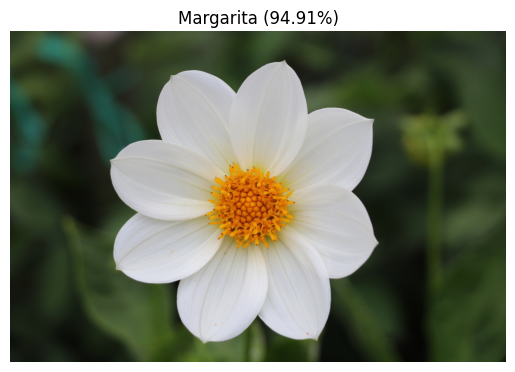

Predicción: Margarita con 94.91% de confianza


In [58]:
import matplotlib.pyplot as plt

# Lista con los nombres de tus clases
clases = ['Dientes', 'Girasoles', 'Margarita', 'Rosas', 'Tulipan']

def categorizar_y_mostrar(url):
    # Descargar imagen
    respuesta = requests.get(url)
    img = Image.open(BytesIO(respuesta.content))

    # Preparar para predicción
    img_array = np.array(img).astype(float)/255
    img_resized = cv2.resize(img_array, (224,224))

    # Predicción
    prediccion = modelo.predict(img_resized.reshape(-1, 224, 224, 3))
    indice = np.argmax(prediccion[0], axis=-1)
    nombre_clase = clases[indice]
    probabilidad = prediccion[0][indice] * 100

    # Mostrar imagen y resultado
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{nombre_clase} ({probabilidad:.2f}%)")
    plt.show()

    return nombre_clase, probabilidad

# Ejemplo de uso
url = 'https://terapianaturalmurcia.es/wp-content/uploads/2018/06/pexels-photo-220049.jpeg'
nombre, prob = categorizar_y_mostrar(url)
print(f"Predicción: {nombre} con {prob:.2f}% de confianza")